# CSE 482 Exercise 5 (Date: February 8, 2019)

In this exercise, you will learn how to train regression models to predict the price of a stock. The goal is to answer the question: Can we predict the stock price using its historical information only? Submit the notebook along with its HTML version to D2L.

**1.** In this exercise, you will attempt to predict changes in the daily price of a stock. Our goal is to predict the change in the closing price of a stock based on changes observed in the previous 4 trading days. Specifically, we will use the stock price of McDonalds Corporation as an example. First, you need to download the stock price dataset from the Yahoo finance website:

    a. Open a browser and go to http://finance.yahoo.com
    
    b. The stock ticker symbol for McDonalds Corporation is MCD. Type MCD in the search bar on the top of the page. It will display the current stockprice for McDonalds.
    
    c. Use the historical data tab and select the time period from 1/1/1990 to 12/31/2018. Click on the "Apply" button.
    
    d. Use the "Download Data" link and save the data in CSV format (as data.csv) on your local machine.

**2.** Use pandas to load the CSV file into a DataFrame object named 'data'. Display the first five rows of the data frame.

**Solution:**

In [1]:
import pandas as pd
%matplotlib inline

data = pd.read_csv('data.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,8.59375,8.71875,8.56250,8.71875,4.271320,3128000
1,1990-01-03,8.68750,8.68750,8.56250,8.62500,4.225395,4244800
2,1990-01-04,8.62500,8.65625,8.43750,8.46875,4.148847,3026400
3,1990-01-05,8.43750,8.50000,8.21875,8.31250,4.072302,4822400
4,1990-01-08,8.28125,8.50000,8.21875,8.46875,4.148847,3346000


**3.** Extract a Series object named closingPrice based on the "Close" column of the data frame. Set the index of the closingPrice Series to be the same as the "Date" column of the data frame. Draw a line plot to display the daily closing price of the stock.

[Text(0, 0.5, 'Closing Price')]

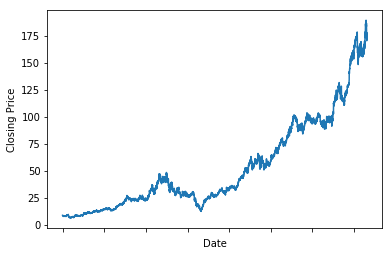

In [2]:
closingPrice = data.Close
closingPrice.index = data.Date
ax = closingPrice.plot(kind='line')
ax.set(ylabel='Closing Price')

**4.** Create a Series object for the target variable Y that contains the change in the daily closing price of the stock. To do this, you need subtract the closing price of each day with the corresponding closing price of its previous day. Display the first 5 values of the series and draw a line plot of the time series.

**Solution:**

Date
1990-01-03   -0.09375
1990-01-04   -0.15625
1990-01-05   -0.15625
1990-01-08    0.15625
1990-01-09   -0.06250
dtype: float64

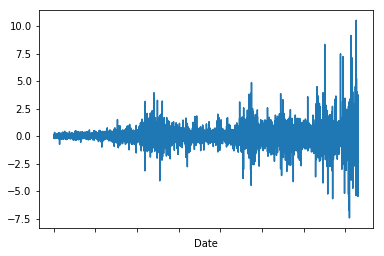

In [3]:
N = closingPrice.shape[0]
Y = pd.Series(closingPrice[1:].values - closingPrice[:N-1].values, index=closingPrice.index[1:])
Y.plot(kind='line')
Y.head()

**5.** We will use the change in the closing price of its 4 previous days as predictor variables. Create a dataframe called X that has 4 columns, which correspond to the price changes from its previous 4 trading days.

**Solution:**

In [4]:
N = Y.shape[0]
X = pd.DataFrame( Y[:N-3].values,columns=['t-4'])
X['t-3'] = Y[1:N-2].values
X['t-2'] = Y[2:N-1].values
X['t-1'] = Y[3:N].values
X = X[:-1]
X.index = Y[4:].index
X.head()

,t-4,t-3,t-2,t-1
Date,,,,
1990-01-09,-0.09375,-0.15625,-0.15625,0.15625
1990-01-10,-0.15625,-0.15625,0.15625,-0.06250
1990-01-11,-0.15625,0.15625,-0.06250,-0.15625
1990-01-12,0.15625,-0.06250,-0.15625,-0.06250
1990-01-15,-0.06250,-0.15625,-0.06250,-0.15625


**6.** Extract the corresponding target values starting from 1990-01-09 until 2018-12-31. Make sure the number of rows and dates in Y are consistent with those for X.

In [5]:
y = Y[(Y.index >= "1990-01-09") & (Y.index <= "2018-12-31") ]
y.head()

Date
1990-01-09   -0.06250
1990-01-10   -0.15625
1990-01-11   -0.06250
1990-01-12   -0.15625
1990-01-15   -0.09375
dtype: float64

**7.** Divide the data into 70% training and 30% test sets using scikit-learn train_test_split. Set the random state to be 1.

**Solution:**

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30 , random_state=1)

**8.** Fit a linear regression model to the training data. Apply the model to predict the stock price in the test data and calculate its root-mean-square error and r-square coefficient. Print the regression coefficients (slope and intercept) of the model.

**Solution:**

In [7]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

# Apply model to the test set
y_pred_test = regr.predict(X_test)

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)) )
print("R-square = %.4f" % r2_score(y_test, y_pred_test) )
print('Slope Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Root mean squared error = 0.8020
R-square = 0.0018
Slope Coefficients: [-0.02109665 -0.00565807 -0.03362753 -0.04991953]
Intercept: 0.018858689104709697


**9.** Based on the results, determine whether it is possible to build an accurate linear regression model to predict the price of a stock based on its historical prices. Answer yes or no.

No. R-square is very small. Even with more than 4 days, this is not an accurate method. 